In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
# image libraries
import cv2

In [ ]:
train_img_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train'
train = []

train_label = []


# Ensure the directory path is valid
if os.path.exists(train_img_path):
    # List all subdirectories in the main directory
    subdirectories = os.listdir(train_img_path)

    # Loop through all subdirectories
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(train_img_path, subdirectory)

        # Check if the subdirectory exists and is a directory
        if os.path.isdir(subdirectory_path):
            # List all files in the subdirectory
            file_list = os.listdir(subdirectory_path)

            # Loop through all files in the subdirectory
            for file_name in file_list:
                # Construct the full path to the file
                file_path = os.path.join(subdirectory_path, file_name)

                # Check if the file is an image (you may need to adjust the condition based on your file types)
                if file_name.endswith(('.jpg')):
                    # Read the image using OpenCV
                    img = cv2.imread(file_path)
                    img=img/255
                    # Assign label based on the subdirectory name
                    if subdirectory == 'FAKE':

                        train.append(img)
                        train_label.append(0)  # Assign label 0 for fake images
                    elif subdirectory == 'REAL':
                        train.append(img)
                        train_label.append(1)  # Assign label 1 for real images
                    # Add more conditions if yo}u have other types of directories to process
                    # ...
else:
    print(f"The directory {train_img_path} does not exist.")

In [ ]:
train=np.array(train)
print(train.shape)
train_label=np.array(train_label)
print(train_label.shape)


(100000, 32, 32, 3)
(100000,)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(train, train_label, test_size=0.2, random_state=42)

# CNN Model

In [ ]:
# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

# Run Model

idk, why kaggle isn't using GPU here, run 5-10 epochs atleast.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback
model_checkpoint = ModelCheckpoint(filepath='model_checkpoint.h5',
                                   save_best_only=True)

In [ ]:


history = model.fit(X_train,y_train,
                    epochs=10,
                    validation_data= (X_test, y_test),
                    callbacks=[model_checkpoint]
                   )

Epoch 1/10
2500/2500 [==============================] - 15s 4ms/step - loss: 0.3568 - accuracy: 0.8421 - val_loss: 0.3035 - val_accuracy: 0.8698
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2536 - accuracy: 0.8964 - val_loss: 0.2577 - val_accuracy: 0.8938
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2148 - accuracy: 0.9140 - val_loss: 0.2265 - val_accuracy: 0.9076
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1914 - accuracy: 0.9226 - val_loss: 0.2226 - val_accuracy: 0.9157
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1720 - accuracy: 0.9319 - val_loss: 0.1893 - val_accuracy: 0.9257
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1582 - accuracy: 0.9380 - val_loss: 0.1891 - val_accuracy: 0.9276
Epoch 7/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1437 - accuracy: 0.9437 - val_loss: 0.2338 - val_ac

In [ ]:
model.save('fake_real.h5')

In [ ]:
test_img_path = '/kaggle/input/cifake-real-and-ai-generated-synthetic-images/test'
test = []

test_label = []


# Ensure the directory path is valid
if os.path.exists(test_img_path):
    # List all subdirectories in the main directory
    subdirectories = os.listdir(test_img_path)

    # Loop through all subdirectories
    for subdirectory in subdirectories:
        subdirectory_path = os.path.join(test_img_path, subdirectory)

        # Check if the subdirectory exists and is a directory
        if os.path.isdir(subdirectory_path):
            # List all files in the subdirectory
            file_list = os.listdir(subdirectory_path)

            # Loop through all files in the subdirectory
            for file_name in file_list:
                # Construct the full path to the file
                file_path = os.path.join(subdirectory_path, file_name)

                # Check if the file is an image (you may need to adjust the condition based on your file types)
                if file_name.endswith(('.jpg')):
                    # Read the image using OpenCV
                    img = cv2.imread(file_path)
                    img=img/255
                    # Assign label based on the subdirectory name
                    if subdirectory == 'FAKE':
                        test.append(img)
                        test_label.append(0)  # Assign label 0 for fake images
                    elif subdirectory == 'REAL':
                        test.append(img)
                        test_label.append(1)  # Assign label 1 for real images
                    # Add more conditions if yo}u have other types of directories to process
                    # ...
else:
    print(f"The directory {test_img_path} does not exist.")

In [ ]:
test=np.array(test)
print(test.shape)
test_label=np.array(test_label)
print(test_label.shape)

(20000, 32, 32, 3)
(20000,)


In [ ]:
model.evaluate(test,test_label)

625/625 [==============================] - 1s 2ms/step - loss: 0.1924 - accuracy: 0.9316


[0.192388653755188, 0.9315999746322632]

In [ ]:
from tensorflow.keras.models import load_model

modelnew=load_model('fake_real.h5')

In [ ]:



# make predictiontest1_Dataset
predictions = model.predict(test)

625/625 [==============================] - 1s 2ms/step


In [ ]:
binary_predictions = (predictions > 0.5).astype(int)
binary_predictions

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
import cv2
im=cv2.imread('/kaggle/input/cifake-real-and-ai-generated-synthetic-images/train/REAL/0002 (9).jpg')
im=im/255
print(im.shape)
im=im.reshape(1,32,32,3)
pred= model.predict(im)
print(pred)
pred=(pred > 0.5).astype(int)

print("Predicted class:", pred)

(32, 32, 3)
1/1 [==============================] - 0s 134ms/step
[[0.99358726]]
Predicted class: [[1]]


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have true labels (ground truth)
true_labels = y_test

# Generate a confusion matrix
sns.heatmap(confusion_matrix(true_labels, binary_predictions), annot=True)

# Print classification report
print(classification_report(true_labels, binary_predictions))

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()

NameError: name 'y_test' is not defined

In [ ]:
def plot_training_graph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training accuracy','validation accuracy'], loc='best')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training loss','validation loss'], loc='best')
    plt.show()

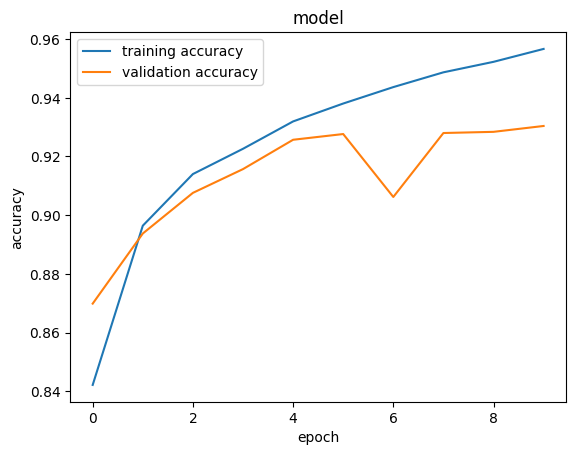

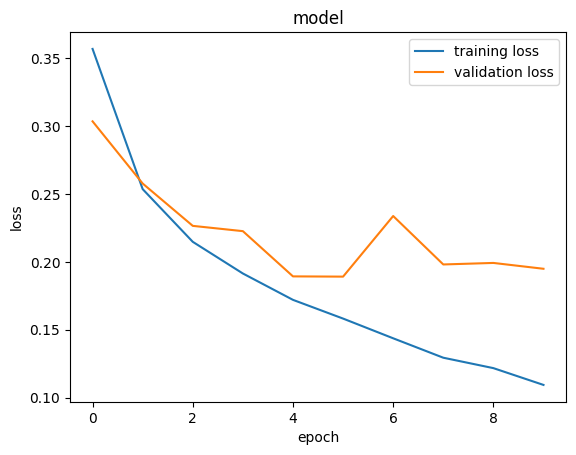

In [ ]:
plot_training_graph(history)

In [2]:
!git config --global user.email "your_real_email@example.com"
!git config --global user.name "Akashpryrm"

# (Run only once – if already cloned, skip cloning again)
!git clone https://github.com/Akashpryrm/my-colab-project.git
%cd my-colab-project

# Copy the notebook (replace with the correct path)
!cp "/content/fake-image-detection-using-cnn (1).ipynb" .

# Add and commit
!git add .
!git commit -m "Added fake image detection project"

# Make sure branch exists
!git branch -M main

# Push to GitHub
!git push -u origin main



Cloning into 'my-colab-project'...
/content/my-colab-project/my-colab-project
cp: cannot stat '/content/fake-image-detection-using-cnn (1).ipynb': No such file or directory
On branch main

Initial commit

nothing to commit (create/copy files and use "git add" to track)
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Akashpryrm/my-colab-project.git'
